In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import UsefulFunctions as uf


In [82]:
col = 'event, stationcode, hypodist, maxacc, vapp'.split(', ')
vapp_dict = {}
vapp_df = pd.DataFrame()
directory = 'Vapps'
for file in os.listdir(directory):
    if file.endswith('_vapps.txt'):
        path = directory + '/' + file
        name = file.replace('_vapps.txt', '')
        
        df = pd.read_csv(path, names=col, skiprows=1)
        vapp_dict[name] = df
        vapp_df = pd.concat([vapp_df, df], axis=0, ignore_index=True)
        
event = vapp_df['event']
dist = vapp_df['hypodist']
maxacc = vapp_df['maxacc']
vapp = vapp_df['vapp']


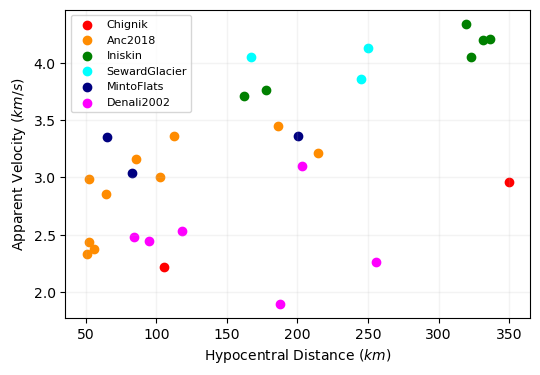

In [147]:
c = ['red', 'darkorange', 'green', 'aqua', 'navy', 'magenta']
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)
i = 0
for k, v in vapp_dict.items():
    ax.scatter(v['hypodist'], v['vapp'], c=c[i], label=k)
    i+=1
    
ax.legend(fontsize=8)
ax.set_ylabel(r'Apparent Velocity $(km/s)$')
ax.set_xlabel(r'Hypocentral Distance $(km)$')
ax.grid(alpha=0.15, lw=1)
# ax.set_facecolor('white')
# fig.patch.set_facecolor('gainsboro')
plt.show()

Text(0, 0.5, 'Count')

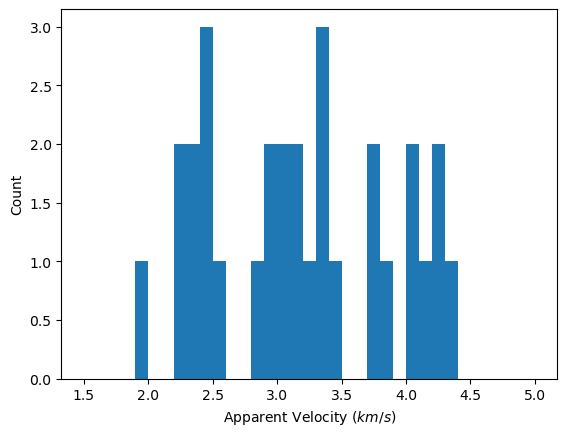

In [174]:
counts, bins = np.histogram(vapp.values, bins=35, range=[1.5,5])
plt.figure()
plt.stairs(counts, bins, fill=True)
plt.xlabel(r'Apparent Velocity $(km/s)$')
plt.ylabel('Count')

In [161]:
print(vapp.mean())
print(vapp.median())
print(vapp.values)
print(bins)

3.171333333333334
3.13
[2.22 2.96 3.   3.16 3.21 2.33 2.44 2.38 2.99 3.36 2.86 3.45 3.76 3.71
 4.21 4.05 4.34 4.2  4.05 3.86 4.13 3.36 3.04 3.35 3.1  2.53 2.45 2.48
 1.9  2.26]
[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2
 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
